## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [2]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

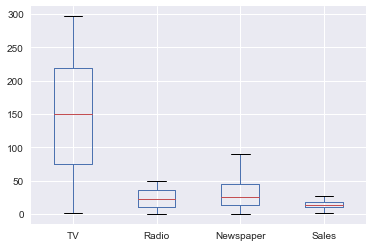

In [3]:
df.boxplot()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

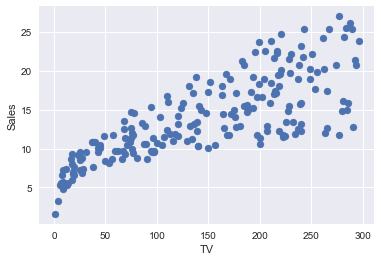

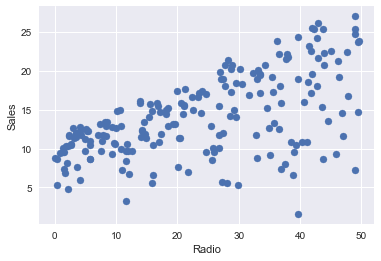

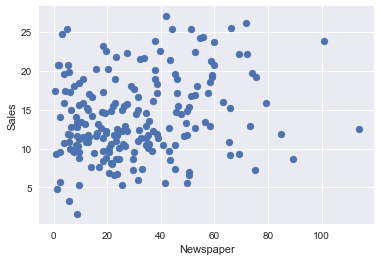

In [4]:
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()

ax1 = fig1.add_subplot(111)
ax1.scatter(df['TV'], df['Sales'])
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

ax2 = fig2.add_subplot(111)
ax2.scatter(df['Radio'], df['Sales'])
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')

ax3 = fig3.add_subplot(111)
ax3.scatter(df['Newspaper'], df['Sales'])
ax3.set_xlabel('Newspaper')
ax3.set_ylabel('Sales')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C019501B38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002C01AF4B780>]], dtype=object)

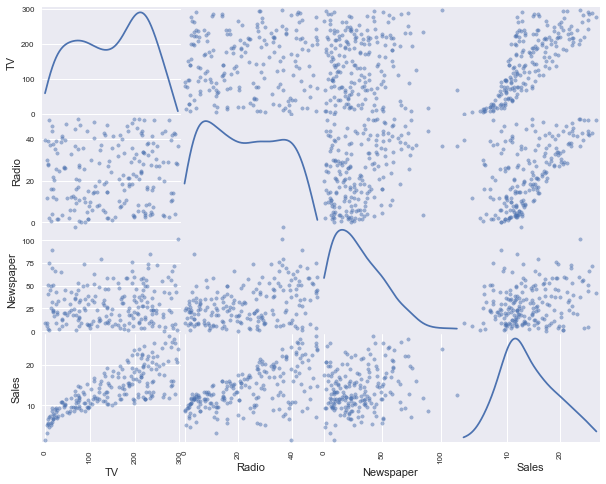

In [4]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,8), diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer

$\bf{Solution:}$
TV is correlated with sales, and Radio is correlated with sales as well. There is a clear trend in both scatter plots of Radio and TV, these two variables seem to increse with sales. Newspaper is not correlated with sales since the data points are scattered all over the place without an apparent trend.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import numpy

a) Set y to be the sales in df

In [6]:
df = shuffle(df) # We first shuffle the rows of this data set
y = df['Sales']

b) Set X to be just the features described above in df

In [7]:
X = df[['TV', 'Radio','Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [8]:
size = len(df)

# Split the features into training/testing sets
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

# Split the Sales into training/testing sets
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]

d) Train model on training data, and make predictions on testing data

In [9]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions on testingdata
regr.predict(X_test)

array([ 13.88327816,  20.38871905,  17.2058103 ,  11.95956086,
         8.7565815 ,  20.62605034,  12.90478675,  21.06916973,
         8.90294329,  10.10003304,  10.59611091,  14.22923548,
         8.41167513,  15.11269031,   7.3876857 ,  19.72949728,
        20.75649693,   6.0062426 ,  13.98795224,   4.42358066,
        11.47362309,  15.34360671,  17.69326794,   9.75086319,
         7.15398886,  15.2828881 ,  15.75613324,  21.70314096,
        14.71619395,  15.31886565,   8.71967978,   9.91946136,
         5.76556972,  11.13372869,  22.24828415,  15.37852187,
        22.98402957,  12.65779918,  22.7499246 ,  15.3570875 ])

e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [10]:
# Calculate R-squared on testing data
print('R^2 on testing data: %.2f' % regr.score(X_test, y_test))

R^2 on testing data: 0.90


$\bf {Solution:}$
This linear model explains about 90% of the response variable variation, which seems to be good. However, a high R-squared might not be inherently good. We cannot determine whether our model is good based solely on R-squred value since it cannot determine whether the coefficient estimates are biased; we might have a good R-squared value for a model that does not fit the data.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

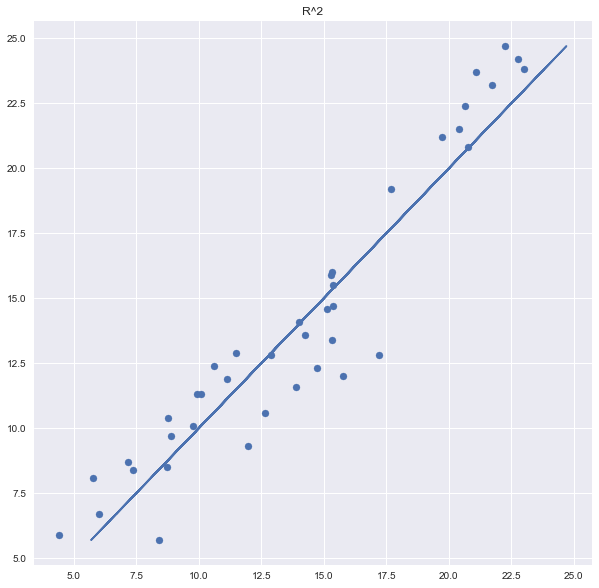

In [11]:
plt.figure(figsize=(10,10))
plt.title('R^2')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)
# It looks like a good model since the data points are closely scattered along the fitted line.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [12]:
regr.coef_

array([ 0.04634758,  0.18443174, -0.00459593])

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

$\bf {Solution:}$
From the results above, we can see that Radio has the highest coefficient among all three variables. With one unit increase in the money spent on Radio, there will be about 0.19568214 unit increase in sales. However, we cannot use the magnitude of coefficients to directly measure the importance of variables. In this example, we see that the money spent on TV is generally much more than money spent on Radio. Thus although the coefficient of TV is small, the impact on sales might still be large due to the larger base. Hence before we measure the importance of the features, we need to standardize our features first.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

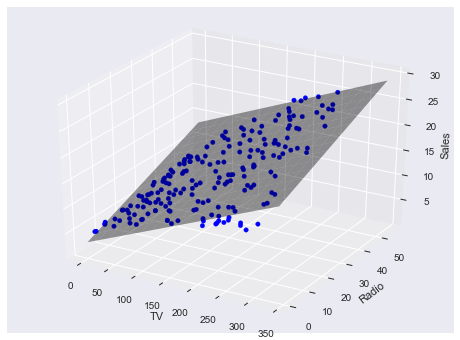

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
fit = model.fit()

fit.summary()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

plt.show()

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.041077716587682944, m = 1.478684735387264, error = 112.64345199560078


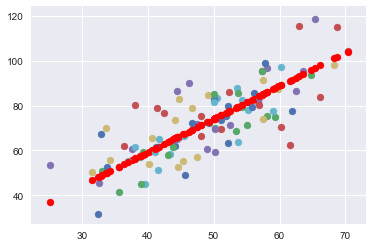

In [14]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    #learning_rate = 0.0001
    #learning_rate = 0.000005
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100, 0.0002)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


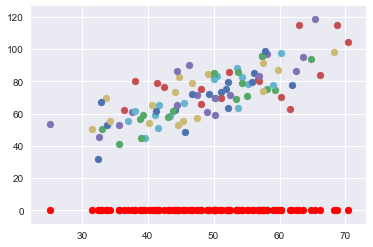

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


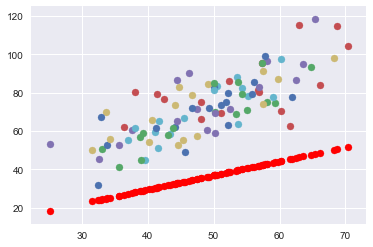

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


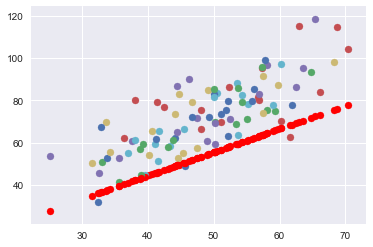

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


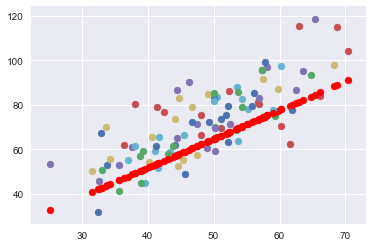

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


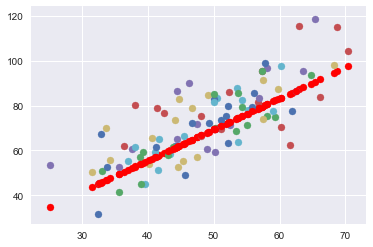

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


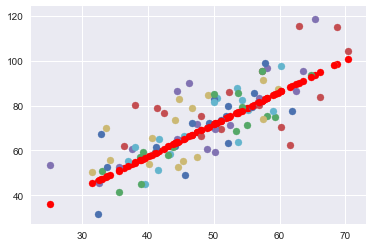

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


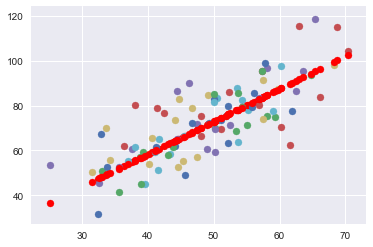

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


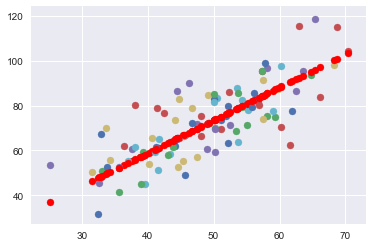

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


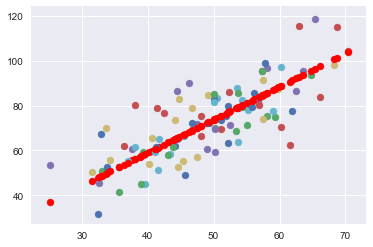

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


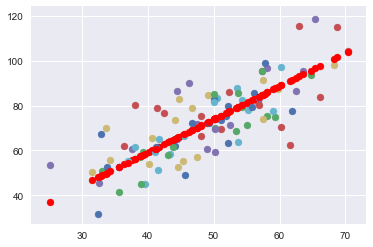

In [15]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num, 0.0001)
    plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

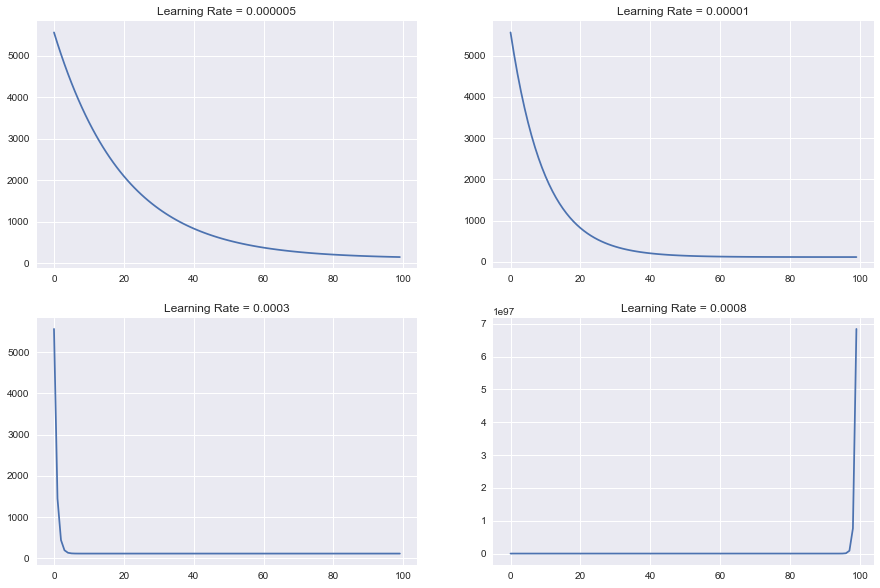

In [16]:
def plot(num_iterations, learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    #learning_rate = 0.0001
    #learning_rate = 0.000005
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    error = []
    num = []
    for n in range(num_iterations):
        num.append(n)
        [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, n)
        error.append(compute_error_for_line_given_points(b, m, points))
    plt.plot(num, error)

fig = plt.figure(figsize=(15,10))
plt.subplot(221, title='Learning Rate = 0.000005')
plot(100,0.000005)
plt.subplot(222, title='Learning Rate = 0.00001')
plot(100,0.00001)
plt.subplot(223, title='Learning Rate = 0.0003')
plot(100,0.0003)
plt.subplot(224, title='Learning Rate = 0.0008')
plot(100, 0.0008)

$\bf {Solution:}$
From the plots above, we can find that when the learning rate is really small, it takes way more iterations to achieve a small enough error. On the other hand, when we choose large learning rate like 0.0008, we will never achieve convergence since the step we take is too large so that we overshoot the target, moving around the minimum.